<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/011_rnn_lstm_v10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.05.08 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Monthly Revenue Forecasting with RNN & LSTM - Results (2018-2022)**

### Contents

##### 1. Input Data
##### 5. Model Training
*  預先訓練多個模型並儲存
*  Training History

##### 7. Predicting Results & Feature Importance
*  Output Functions
*  RNN
*  LSTM
*  Scores (RMSE, MAPE, MAE, MAE%)

##### 8. Plots
*  Expected v.s. Predicted
*  Scores: RMSE, MAPE, MAE, MAE%
*  Feature Importance

##### 9. Best and Worst Model
*  各模型組合中，預測最好和最差的月份
*  RNN 和 LSTM 各自預測最好和最差的模型組合
*  所有模型組合中，預測最好和最差的模型組合


## **0. Setup**

In [ ]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
!pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00


In [ ]:
import import_ipynb
%cd '/content/gdrive/Shareddrives/Me/論文/code/Function'

/content/gdrive/MyDrive/論文/code/Function


In [ ]:
from MonRevForecast import predictMonthlyRevenueNN, BestWorstModelNN, trainMonthlyRevenueNN

importing Jupyter notebook from MonRevForecast.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.0 MB/s eta 0:00:00


In [ ]:
from MonRevPlot import plotExpectedPredictedRevenues, plotModelExpectedPredictedRevenues

importing Jupyter notebook from MonRevPlot.ipynb


In [ ]:
from MonRevPlot import plotAllScores, compareModelScore, scoreBoxplotV

In [ ]:
from MonRevForecast import plotTrainingHistory

### **Project Path**

In [ ]:
project_path = '/content/gdrive/Shareddrives/Me/論文'

## **1. Input Data**

【**月營收盈餘 (2013-2022)**】

資料期間：2013年1月至2022年12月（共120個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站


In [ ]:
org_data = pd.read_excel(os.path.join(project_path, '資料集/007_v1/201301-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  \
公司                                                                        
1101 台泥   9134465  5540346  9457971  9919269  9543782  9517630  9875888   
1102 亞泥   6018213  2552357  5428755  5930748  6239676  5952754  5942364   
1103 嘉泥    288455   166638   286007   365292   382601   302995   294781   
1104 環泥    486481   299860   461732   394631   406677   415968   453397   
1108 幸福    481802   276936   444917   362054   381384   368109   439572   
...           ...      ...      ...      ...      ...      ...      ...   
9951 皇田    201785   167967   240746   243935   238296   193880   198427   
9955 佳龍    394489   383183   428478   564053   336622   295391   434605   
9958 世紀鋼   198944   166364   351222   280864   289332   426371   213281   
9960 邁達康    52534    41935    61642    70998    81508    64525    62085   
9962 有益    298876   327002   313861   241566   251782   273664   174682   

          2013-08   2013-09   2013-10  ...  2022-03  2022-04  2022-05  \
公司                                     ...                              
1101 台泥   9835143  10060975  10654077  ...  9971650  8319342  7733787   
1102 亞泥   5786107   5879394   6478670  ...  8160414  8710220  8000427   
1103 嘉泥    336088    314563    429783  ...   220463   168089   163521   
1104 環泥    393203    448691    521445  ...   591593   638493   537082   
1108 幸福    379115    387362    450770  ...   345612   335518   332258   
...           ...       ...       ...  ...      ...      ...      ...   
9951 皇田    256724    228796    250756  ...   374229   302262   323433   
9955 佳龍    306534    266617    363766  ...    96200   101850    95096   
9958 世紀鋼   302589    401695    255738  ...   626104   401960   673479   
9960 邁達康    60960     60309     61582  ...    60275    86754    69752   
9962 有益    238490    165340    202491  ...   366892   248958   228412   

          2022-06   2022-07   2022-08   2022-09   2022-10  2022-11   2022-12  
公司                                                                            
1101 台泥   9145989  10102468  10689860  10404901  11368096  9674576  12584154  
1102 亞泥   7776413   7864622   7069221   6994078   7601097  8306062   8340507  
1103 嘉泥    183177    178825    182371    205264    209429   221763    228644  
1104 環泥    573028    580420    605512    597159    634981   631827    725055  
1108 幸福    334113    326691    390053    346635    401202   383773    418326  
...           ...       ...       ...       ...       ...      ...       ...  
9951 皇田    371791    337581    468608    464373    432835   500111    506796  
9955 佳龍     80726     85625     81881     79179     80630    91270     84115  
9958 世紀鋼   665459    651699    757968    903198    911834   944060   1082675  
9960 邁達康   103280     64983    105969    113755     78996    96570     58764  
9962 有益    387082    248327    318092    264270    307426   308663    385673  

[1240 rows x 120 columns]

In [ ]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1240, 120)
Data size: 148800


## **5. Model Training**

### **5.2.3 預先訓練多個模型並儲存**


In [ ]:
model_save_path_rnn = os.path.join(project_path, 'model/rnn')
model_save_path_lstm = os.path.join(project_path, 'model/lstm')

In [ ]:
test_y_1 = 2018
test_y_2 = 2019
test_y_3 = 2020
test_y_4 = 2021
test_y_5 = 2022
start_m_1 = 1
end_m_1 = 6
start_m_2 = 7
end_m_2 = 12

#### **RNN**

2018 (5 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'rnn', model_save_path_rnn)

2018-01 model saved. Using time: 1518.003  secs.
2018-02 model saved. Using time: 1489.613  secs.
2018-03 model saved. Using time: 1555.890  secs.
2018-04 model saved. Using time: 1606.050  secs.
2018-05 model saved. Using time: 1540.342  secs.
2018-06 model saved. Using time: 1577.537  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_2, test_y_1, end_m_2, 'rnn', model_save_path_rnn)

2018-07 model saved. Using time: 1432.331  secs.
2018-08 model saved. Using time: 1429.986  secs.
2018-09 model saved. Using time: 1430.652  secs.
2018-10 model saved. Using time: 1472.926  secs.
2018-11 model saved. Using time: 1436.240  secs.
2018-12 model saved. Using time: 1426.681  secs.


2019 (5.2 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'rnn', model_save_path_rnn)

2019-01 model saved. Using time: 1610.213  secs.
2019-02 model saved. Using time: 1462.016  secs.
2019-03 model saved. Using time: 1474.264  secs.
2019-04 model saved. Using time: 1514.689  secs.
2019-05 model saved. Using time: 1568.860  secs.
2019-06 model saved. Using time: 1618.993  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_2, test_y_2, end_m_2, 'rnn', model_save_path_rnn)

2019-07 model saved. Using time: 1586.989  secs.
2019-08 model saved. Using time: 1595.041  secs.
2019-09 model saved. Using time: 1589.734  secs.
2019-10 model saved. Using time: 1562.924  secs.
2019-11 model saved. Using time: 1617.731  secs.
2019-12 model saved. Using time: 1576.132  secs.


2020 (5 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'rnn', model_save_path_rnn)

2020-01 model saved. Using time: 1421.613  secs.
2020-02 model saved. Using time: 1505.455  secs.
2020-03 model saved. Using time: 1501.873  secs.
2020-04 model saved. Using time: 1469.617  secs.
2020-05 model saved. Using time: 1486.336  secs.
2020-06 model saved. Using time: 1496.918  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_2, test_y_3, end_m_2, 'rnn', model_save_path_rnn)

2020-07 model saved. Using time: 1534.396  secs.
2020-08 model saved. Using time: 1557.233  secs.
2020-09 model saved. Using time: 1409.565  secs.
2020-10 model saved. Using time: 1556.019  secs.
2020-11 model saved. Using time: 1581.490  secs.
2020-12 model saved. Using time: 1676.388  secs.


2021 (4.5 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_4, start_m_1, test_y_4, end_m_1, 'rnn', model_save_path_rnn)

2021-01 model saved. Using time: 1461.585  secs.
2021-02 model saved. Using time: 1490.952  secs.
2021-03 model saved. Using time: 1437.333  secs.
2021-04 model saved. Using time: 1465.728  secs.
2021-05 model saved. Using time: 1410.709  secs.
2021-06 model saved. Using time: 1448.151  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_4, start_m_2, test_y_4, end_m_2, 'rnn', model_save_path_rnn)

2021-07 model saved. Using time: 1210.175  secs.
2021-08 model saved. Using time: 1305.069  secs.
2021-09 model saved. Using time: 1321.014  secs.
2021-10 model saved. Using time: 1340.275  secs.
2021-11 model saved. Using time: 1175.605  secs.
2021-12 model saved. Using time: 1246.512  secs.


2022 (4.8 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_5, start_m_1, test_y_5, end_m_1, 'rnn', model_save_path_rnn)

2022-01 model saved. Using time: 1400.751  secs.
2022-02 model saved. Using time: 1373.025  secs.
2022-03 model saved. Using time: 1553.303  secs.
2022-04 model saved. Using time: 1410.856  secs.
2022-05 model saved. Using time: 1493.477  secs.
2022-06 model saved. Using time: 1437.958  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_5, start_m_2, test_y_5, end_m_2, 'rnn', model_save_path_rnn)

2022-07 model saved. Using time: 1445.834  secs.
2022-08 model saved. Using time: 1570.150  secs.
2022-09 model saved. Using time: 1499.265  secs.
2022-10 model saved. Using time: 1516.607  secs.
2022-11 model saved. Using time: 1443.114  secs.
2022-12 model saved. Using time: 1508.129  secs.


#### **LSTM**

2018 (5.7 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'lstm', model_save_path_lstm)

2018-01 model saved. Using time: 1680.639  secs.
2018-02 model saved. Using time: 1794.366  secs.
2018-03 model saved. Using time: 1685.649  secs.
2018-04 model saved. Using time: 1735.019  secs.
2018-05 model saved. Using time: 1747.249  secs.
2018-06 model saved. Using time: 1664.908  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_2, test_y_1, end_m_2, 'lstm', model_save_path_lstm)

2018-07 model saved. Using time: 1677.764  secs.
2018-08 model saved. Using time: 1725.074  secs.
2018-09 model saved. Using time: 1717.720  secs.
2018-10 model saved. Using time: 1756.002  secs.
2018-11 model saved. Using time: 1727.781  secs.
2018-12 model saved. Using time: 1739.794  secs.


2019 (6.3 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'lstm', model_save_path_lstm)

2019-01 model saved. Using time: 1881.279  secs.
2019-02 model saved. Using time: 1871.354  secs.
2019-03 model saved. Using time: 2076.897  secs.
2019-04 model saved. Using time: 1994.948  secs.
2019-05 model saved. Using time: 2184.913  secs.
2019-06 model saved. Using time: 2022.453  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_2, test_y_2, end_m_2, 'lstm', model_save_path_lstm)

2019-07 model saved. Using time: 1847.527  secs.
2019-08 model saved. Using time: 1910.059  secs.
2019-09 model saved. Using time: 1927.076  secs.
2019-10 model saved. Using time: 1801.849  secs.
2019-11 model saved. Using time: 1868.193  secs.
2019-12 model saved. Using time: 1797.978  secs.


2020 (5.4 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'lstm', model_save_path_lstm)

2020-01 model saved. Using time: 1558.649  secs.
2020-02 model saved. Using time: 1707.463  secs.
2020-03 model saved. Using time: 1643.895  secs.
2020-04 model saved. Using time: 1645.822  secs.
2020-05 model saved. Using time: 1581.045  secs.
2020-06 model saved. Using time: 1625.140  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_2, test_y_3, end_m_2, 'lstm', model_save_path_lstm)

2020-07 model saved. Using time: 1598.296  secs.
2020-08 model saved. Using time: 1645.494  secs.
2020-09 model saved. Using time: 1603.508  secs.
2020-10 model saved. Using time: 1589.073  secs.
2020-11 model saved. Using time: 1594.016  secs.
2020-12 model saved. Using time: 1570.868  secs.


2021 (6.1 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_4, start_m_1, test_y_4, end_m_1, 'lstm', model_save_path_lstm)

2021-01 model saved. Using time: 1811.400  secs.
2021-02 model saved. Using time: 1886.421  secs.
2021-03 model saved. Using time: 1892.270  secs.
2021-04 model saved. Using time: 2029.833  secs.
2021-05 model saved. Using time: 1930.658  secs.
2021-06 model saved. Using time: 1837.280  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_4, start_m_2, test_y_4, end_m_2, 'lstm', model_save_path_lstm)

2021-07 model saved. Using time: 1722.944  secs.
2021-08 model saved. Using time: 1733.681  secs.
2021-09 model saved. Using time: 1784.359  secs.
2021-10 model saved. Using time: 1808.761  secs.
2021-11 model saved. Using time: 1809.036  secs.
2021-12 model saved. Using time: 1734.407  secs.


2022 (5.8 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_5, start_m_1, test_y_5, end_m_1, 'lstm', model_save_path_lstm)

2022-01 model saved. Using time: 1812.214  secs.
2022-02 model saved. Using time: 1846.443  secs.
2022-03 model saved. Using time: 1687.280  secs.
2022-04 model saved. Using time: 1891.375  secs.
2022-05 model saved. Using time: 1927.977  secs.
2022-06 model saved. Using time: 1928.876  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_5, start_m_2, test_y_5, end_m_2, 'lstm', model_save_path_lstm)

2022-07 model saved. Using time: 1574.655  secs.
2022-08 model saved. Using time: 1628.011  secs.
2022-09 model saved. Using time: 1584.772  secs.
2022-10 model saved. Using time: 1707.624  secs.
2022-11 model saved. Using time: 1688.938  secs.
2022-12 model saved. Using time: 1577.656  secs.


### **5.2.4 Training History**

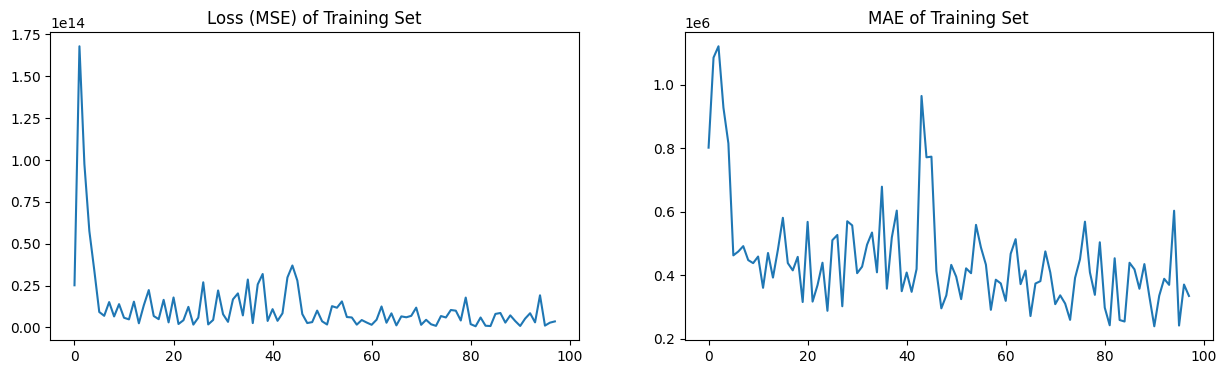

In [ ]:
# RNN
model_save_path_rnn = os.path.join(project_path, 'model/rnn')
plotTrainingHistory(model_save_path_rnn, '2022-12', 'model')

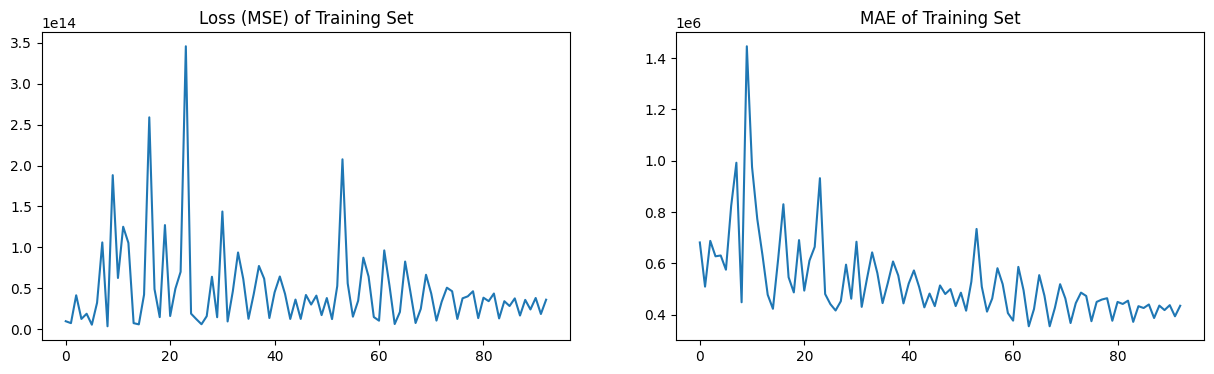

In [ ]:
# LSTM
model_save_path_lstm = os.path.join(project_path, 'model/lstm')
plotTrainingHistory(model_save_path_lstm, '2022-12', 'model')

## **7. Predicting Results**

y_train = y_test 往前 12 個月

<br>

||訓練資料X|訓練資料y|測試資料X|測試資料y|
|---|---|---|---|---|
|Start|2013-01 - 2016-12|2017-01|2014-01 - 2017-12|**2018-01**|
|End|2017-12 - 2021-11|2021-12|2018-12 - 2022-11|**2022-12**|


In [ ]:
# 訓練資料起始年
file_category = '2013'

# 預測年月
start_y = 2018
start_m = 1
end_y = 2022
end_m = 12

### **7.1 Output Functions**

In [ ]:
# Output data path
output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'

In [ ]:
# Output
def outputPredictingResults(category: str, modelName: str, pred: dict):
    pred['org']['org'].to_excel(os.path.join(output_data_path, f'{category}/org_pred_{modelName}_{category}.xlsx'))
    pred['org']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_pred_{modelName}_{category}.xlsx'))
    pred['org']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_pred_{modelName}_{category}.xlsx'))
    pred['def']['org'].to_excel(os.path.join(output_data_path, f'{category}/def_pred_{modelName}_{category}.xlsx'))
    pred['def']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_def_pred_{modelName}_{category}.xlsx'))
    pred['def']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_def_pred_{modelName}_{category}.xlsx'))

def outputScores(category: str, modelName: str, scoresD: pd.DataFrame):
    scoresD.to_excel(os.path.join(output_data_path, f'{category}/scores_{modelName}_{category}.xlsx'))

### **7.2 RNN**

In [ ]:
# Load trained model
model_save_path_rnn = os.path.join(project_path, 'model/rnn')

In [ ]:
# RNN (10 min.)
pred_rnn, scores_rnn = predictMonthlyRevenueNN(org_data, start_y, start_m, end_y, end_m, 'rnn', model_save_path_rnn)

Using time: 514.945  secs.


In [ ]:
# Output
outputPredictingResults(file_category, 'rnn', pred_rnn)
outputScores(file_category, 'rnn', scores_rnn)

#### **7.2.1 Predicting Results**

In [ ]:
# Original
print(pred_rnn['org']['org'].shape)
print(pred_rnn['org']['dec'].shape)
print(pred_rnn['org']['season'].shape)
pred_rnn['org']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04    2018-05    2018-06  \
1101 台泥  7746586.0  7212946.0  8934708.0  8173168.0  7981169.0  9524271.0   
1102 亞泥  5161732.0  4960274.0  5772442.0  5467162.0  5374819.0  6261218.0   
1103 嘉泥   220976.0   182166.0   207560.0   186984.0   149294.0   143498.0   
1104 環泥   371422.0   341269.0   412987.0   387512.0   331834.0   383650.0   

           2018-07    2018-08     2018-09     2018-10  ...    2022-03  \
1101 台泥  9696625.0  8762304.0  10129107.0  11496067.0  ...  9834872.0   
1102 亞泥  6532857.0  5905234.0   6879107.0   7980654.0  ...  7976248.0   
1103 嘉泥   187595.0   152592.0    183235.0    214267.0  ...   189871.0   
1104 環泥   377751.0   348065.0    387810.0    413074.0  ...   534404.0   

           2022-04    2022-05    2022-06    2022-07    2022-08     2022-09  \
1101 台泥  9440845.0  8186870.0  8056044.0  8749665.0  8623387.0  10626881.0   
1102 亞泥  7529574.0  7281065.0  7592187.0  8046822.0  7940140.0   9376986.0   
1103 嘉泥   180645.0   178579.0   184413.0   183879.0   185780.0    215507.0   
1104 環泥   500224.0   526049.0   600987.0   586166.0   612022.0    715629.0   

            2022-10     2022-11     2022-12  
1101 台泥  10805593.0  11025157.0  12647327.0  
1102 亞泥   8050394.0   8830774.0  10415103.0  
1103 嘉泥    205681.0    221101.0    223214.0  
1104 環泥    624847.0    710710.0    682806.0  

[4 rows x 60 columns]

In [ ]:
# Deflating
print(pred_rnn['def']['org'].shape)
print(pred_rnn['def']['dec'].shape)
print(pred_rnn['def']['season'].shape)
pred_rnn['def']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04     2018-05     2018-06  \
1101 台泥  7213198.0  7586058.0  7949300.0  8551634.0  10081506.0  11293898.0   
1102 亞泥  4835955.0  4504834.0  6171631.0  5871764.0   6665869.0   7481860.0   
1103 嘉泥   138322.0   101849.0   157413.0   215293.0    169363.0    184034.0   
1104 環泥   343188.0   339730.0   398862.0   424343.0    389738.0    415716.0   

            2018-07     2018-08     2018-09    2018-10  ...    2022-03  \
1101 台泥  10148634.0  11442967.0  10584235.0  9945439.0  ...  9521168.0   
1102 亞泥   7142562.0   7976743.0   7216645.0  6684592.0  ...  7935328.0   
1103 嘉泥    171861.0    176008.0    189127.0   168889.0  ...   180402.0   
1104 環泥    373186.0    381907.0    351379.0   401545.0  ...   572084.0   

           2022-04    2022-05    2022-06    2022-07    2022-08     2022-09  \
1101 台泥  8855836.0  8313250.0  9183873.0  7286936.0  9195864.0  10206860.0   
1102 亞泥  8363397.0  8144228.0  8913710.0  8430461.0  7936044.0   7453466.0   
1103 嘉泥   213582.0   173087.0   162702.0   170256.0   178595.0    178397.0   
1104 環泥   610904.0   579506.0   499932.0   596231.0   572528.0    597171.0   

            2022-10     2022-11     2022-12  
1101 台泥  10459210.0  12123249.0  12297283.0  
1102 亞泥   7353378.0   8551492.0   9532092.0  
1103 嘉泥    205120.0    217141.0    214902.0  
1104 環泥    605290.0    635207.0    671163.0  

[4 rows x 60 columns]

### **7.3 LSTM**


In [ ]:
# Load trained models
model_save_path_lstm = os.path.join(project_path, 'model/lstm')

In [ ]:
# LSTM (12 min.)
pred_lstm, scores_lstm = predictMonthlyRevenueNN(org_data, start_y, start_m, end_y, end_m, 'lstm', model_save_path_lstm)

Using time: 717.076  secs.


In [ ]:
# Output
outputPredictingResults(file_category, 'lstm', pred_lstm)
outputScores(file_category, 'lstm', scores_lstm)

#### **7.3.1 Predicting Results**

In [ ]:
print(pred_lstm['org']['org'].shape)
print(pred_lstm['org']['dec'].shape)
print(pred_lstm['org']['season'].shape)
pred_lstm['org']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04    2018-05    2018-06  \
1101 台泥  6899318.0  7562964.0  8767362.0  8056488.0  8197497.0  9236256.0   
1102 亞泥  4792959.0  5123636.0  5876760.0  5300284.0  5529845.0  5982478.0   
1103 嘉泥   178760.0   152756.0   200216.0   147965.0   150262.0   152110.0   
1104 環泥   340875.0   366223.0   418638.0   353688.0   365878.0   363910.0   

           2018-07    2018-08     2018-09    2018-10  ...    2022-03  \
1101 台泥  9642851.0  9464012.0  10674033.0  9782801.0  ...  8266059.0   
1102 亞泥  6508986.0  6430239.0   7272296.0  6603886.0  ...  8127219.0   
1103 嘉泥   189551.0   165331.0    230179.0   195825.0  ...   206689.0   
1104 環泥   373456.0   376519.0    422575.0   410540.0  ...   580322.0   

           2022-04    2022-05    2022-06    2022-07    2022-08     2022-09  \
1101 台泥  9211474.0  9479400.0  9376746.0  8717564.0  8967690.0  11089094.0   
1102 亞泥  7396390.0  8005968.0  8012846.0  7668576.0  8042538.0   9390640.0   
1103 嘉泥   181839.0   183676.0   206331.0   180462.0   192110.0    210839.0   
1104 環泥   510126.0   531057.0   561490.0   564764.0   595146.0    679178.0   

            2022-10     2022-11     2022-12  
1101 台泥  11086115.0  11025695.0  12182495.0  
1102 亞泥   8413919.0   8959868.0   9846340.0  
1103 嘉泥    204007.0    218240.0    251995.0  
1104 環泥    597302.0    674073.0    736317.0  

[4 rows x 60 columns]

In [ ]:
print(pred_lstm['def']['org'].shape)
print(pred_lstm['def']['dec'].shape)
print(pred_lstm['def']['season'].shape)
pred_lstm['def']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04     2018-05     2018-06  \
1101 台泥  7383590.0  7666623.0  8720289.0  8639756.0  10287977.0  11072107.0   
1102 亞泥  4866570.0  4764487.0  6057968.0  5668572.0   6871403.0   7498444.0   
1103 嘉泥   151660.0   100028.0   170572.0   180712.0    179871.0    179025.0   
1104 環泥   358021.0   358504.0   412540.0   393660.0    400590.0    413921.0   

           2018-07     2018-08     2018-09     2018-10  ...    2022-03  \
1101 台泥  9664856.0  11009468.0  10454056.0  10479379.0  ...  8542250.0   
1102 亞泥  6969195.0   7514257.0   7136936.0   7165903.0  ...  8243820.0   
1103 嘉泥   164853.0    153548.0    166327.0    182879.0  ...   178740.0   
1104 環泥   384108.0    373498.0    351124.0    381688.0  ...   578138.0   

           2022-04    2022-05    2022-06    2022-07    2022-08     2022-09  \
1101 台泥  8994510.0  8252122.0  8866560.0  8139953.0  9282929.0  10243738.0   
1102 亞泥  8128504.0  8616805.0  8727575.0  8505486.0  7667185.0   7501405.0   
1103 嘉泥   208116.0   173722.0   149166.0   175982.0   190222.0    186934.0   
1104 環泥   604683.0   593755.0   521108.0   602275.0   583585.0    599667.0   

            2022-10     2022-11     2022-12  
1101 台泥  10160420.0  11759882.0  11772241.0  
1102 亞泥   7387651.0   8394561.0   9134048.0  
1103 嘉泥    201578.0    214709.0    214561.0  
1104 環泥    589097.0    621775.0    669940.0  

[4 rows x 60 columns]

### **7.4 Scores**

In [ ]:
# RNN
scores_rnn

RMSE-org   MAE-org  MAE%-org  MAPE-org   RMSE-def   MAE-def  \
2018-01  1275323.0  248881.0    0.1278    0.3312  1200151.0  225051.0   
2018-02  1291506.0  235002.0    0.1577    0.3803  1440210.0  224615.0   
2018-03  1066107.0  214000.0    0.1140    0.3055  1941756.0  219894.0   
2018-04  1283191.0  225884.0    0.1259    0.3344   845878.0  163111.0   
2018-05  1720352.0  228593.0    0.1207    0.2172   539210.0  136815.0   
2018-06  1459263.0  200546.0    0.1047    0.2920  1184374.0  187333.0   
2018-07  1130289.0  172010.0    0.0874    0.3957  1626843.0  164350.0   
2018-08  1477418.0  229551.0    0.1115    0.2782   910565.0  155117.0   
2018-09  3401430.0  273401.0    0.1225    0.4172  3371508.0  235254.0   
2018-10  1677782.0  252495.0    0.1103    0.3097  4022397.0  315167.0   
2018-11  1284185.0  296164.0    0.1317    0.6305  1235740.0  184669.0   
2018-12  1648427.0  254070.0    0.1181    0.5650   819098.0  183211.0   
2019-01  1037614.0  253092.0    0.1295    0.5310  1317369.0  194596.0   
2019-02  2284379.0  259768.0    0.1812    0.4204  1097868.0  174541.0   
2019-03  1008446.0  228909.0    0.1219    0.2615   647340.0  156355.0   
2019-04  1231930.0  199847.0    0.1084    0.2571  1284384.0  171732.0   
2019-05   813898.0  182587.0    0.0964    0.2680   728479.0  141311.0   
2019-06  1163242.0  217596.0    0.1148    0.2772   792337.0  144952.0   
2019-07  1262301.0  184232.0    0.0952    0.2127   690755.0  131933.0   
2019-08  1839073.0  251563.0    0.1273    0.3135  1401415.0  199525.0   
2019-09  1057998.0  215133.0    0.0975    0.2434  5150886.0  330271.0   
2019-10  2146181.0  351830.0    0.1602    0.3874  1394532.0  167944.0   
2019-11  1425071.0  213632.0    0.0979    0.2675  2950604.0  239974.0   
2019-12  1660751.0  206048.0    0.0973    0.3732  1355752.0  172514.0   
2020-01  2801270.0  402702.0    0.2344    0.4847  2433857.0  318985.0   
2020-02  2862781.0  362657.0    0.2671    1.1861  1444073.0  242669.0   
2020-03  1320814.0  227338.0    0.1248    0.4669  1288868.0  220839.0   
2020-04  1451749.0  296030.0    0.1643    0.6729  1183094.0  224971.0   
2020-05  1453600.0  237886.0    0.1304    0.6540   948128.0  179394.0   
2020-06  1670840.0  259697.0    0.1364    0.3416  1476665.0  206174.0   
2020-07  1309784.0  264302.0    0.1330    0.5102   605486.0  147912.0   
2020-08  1428102.0  276731.0    0.1373    0.8397  1036756.0  188796.0   
2020-09  3052003.0  325192.0    0.1485    0.7208   946263.0  190442.0   
2020-10  2263378.0  254696.0    0.1141    0.9982  3687982.0  276875.0   
2020-11  3196725.0  299717.0    0.1243    0.6466  5322232.0  370860.0   
2020-12  5055664.0  388984.0    0.1580    0.8922  2857134.0  282083.0   
2021-01  3516031.0  493794.0    0.2244    1.1717  1953045.0  391091.0   
2021-02  3707886.0  405502.0    0.2258    2.9145  1011429.0  190613.0   
2021-03  1520544.0  339556.0    0.1508    4.2999  1129182.0  272028.0   
2021-04  2337891.0  372285.0    0.1670    0.2738  1723070.0  244053.0   
2021-05  1446091.0  345700.0    0.1569    0.2868   873928.0  200254.0   
2021-06  1690610.0  266816.0    0.1188    0.7344  3366549.0  273478.0   
2021-07  1742611.0  312034.0    0.1378    0.5062  1997030.0  242695.0   
2021-08  3467309.0  304524.0    0.1327    0.2997  1673955.0  213994.0   
2021-09  2191697.0  282923.0    0.1096    0.3926  2757339.0  281143.0   
2021-10  1974231.0  367240.0    0.1473    0.5624   904397.0  187043.0   
2021-11  2625306.0  320208.0    0.1188    0.2609   863239.0  187486.0   
2021-12  1429086.0  279104.0    0.0989    0.2828  1108811.0  196106.0   
2022-01  3272760.0  367476.0    0.1497    0.3674  2423969.0  301610.0   
2022-02  3300846.0  374350.0    0.1752    0.5034  3241262.0  251249.0   
2022-03  1594116.0  256706.0    0.0973    0.4347  1167298.0  223333.0   
2022-04  2195532.0  333099.0    0.1443    0.2995  2351290.0  384091.0   
2022-05  1540604.0  230095.0    0.0939    0.1991  1088220.0  232546.0   
2022-06  3059062.0  479889.0    0.1809    0.5399  2489633.0  335278.

In [ ]:
# LSTM
scores_lstm

RMSE-org   MAE-org  MAE%-org  MAPE-org   RMSE-def   MAE-def  \
2018-01  1404349.0  278010.0    0.1427    0.2568  1230040.0  230001.0   
2018-02  1377836.0  245165.0    0.1645    0.4193  2018612.0  246018.0   
2018-03  1169519.0  231585.0    0.1233    0.3050  1263208.0  194437.0   
2018-04  1001884.0  204314.0    0.1139    0.2815   912903.0  159475.0   
2018-05  1752408.0  248500.0    0.1312    0.3166   628991.0  136744.0   
2018-06  1654095.0  234010.0    0.1222    0.2525  1174918.0  183251.0   
2018-07   963683.0  182417.0    0.0927    0.4915  1876415.0  199330.0   
2018-08  1375827.0  195249.0    0.0948    0.2320  1005995.0  163606.0   
2018-09  2647324.0  335787.0    0.1504    1.4372  3112284.0  207592.0   
2018-10  2584711.0  294003.0    0.1284    0.2428  3413048.0  281287.0   
2018-11  1084927.0  273351.0    0.1215    0.4651  1882377.0  220593.0   
2018-12  7632567.0  589448.0    0.2740    0.5229  2486180.0  238407.0   
2019-01   999246.0  260837.0    0.1335    0.3412  2206736.0  210044.0   
2019-02  1898399.0  244617.0    0.1706    0.4755  2254399.0  234291.0   
2019-03  1311841.0  256334.0    0.1365    0.2594   772932.0  144760.0   
2019-04  1375659.0  254433.0    0.1380    0.3872  1465104.0  173309.0   
2019-05  1471278.0  256278.0    0.1353    0.3146   943532.0  147734.0   
2019-06   965363.0  214021.0    0.1130    0.3154   954470.0  165951.0   
2019-07  1628202.0  237172.0    0.1225    0.2815   767984.0  134356.0   
2019-08  2126380.0  269291.0    0.1363    0.2555   822683.0  150462.0   
2019-09  1049300.0  237263.0    0.1076    0.2821  5252826.0  311867.0   
2019-10  2017873.0  377951.0    0.1721    0.4264  1035782.0  150362.0   
2019-11  1455962.0  277788.0    0.1273    0.3174  2410458.0  210488.0   
2019-12  2146811.0  282811.0    0.1336    0.5078  2803249.0  221169.0   
2020-01  2364885.0  369087.0    0.2149    0.4878  2010176.0  292857.0   
2020-02  2014964.0  325591.0    0.2398    0.8894  1813180.0  261167.0   
2020-03  1345246.0  235855.0    0.1295    0.5388  1338293.0  219829.0   
2020-04  1539096.0  319238.0    0.1771    0.6572  1543537.0  253587.0   
2020-05  1177735.0  239299.0    0.1312    0.5592   987450.0  177110.0   
2020-06  1618671.0  276360.0    0.1451    0.3920  1483538.0  193906.0   
2020-07  1164071.0  231026.0    0.1162    0.4421   685526.0  152452.0   
2020-08  1352884.0  253071.0    0.1256    0.7192   917186.0  169040.0   
2020-09  3062583.0  380548.0    0.1738    0.5889  1007150.0  177501.0   
2020-10  1905179.0  235875.0    0.1056    0.3039  2707347.0  234463.0   
2020-11  2712873.0  331147.0    0.1374    0.5914  4486899.0  324788.0   
2020-12  4941285.0  428764.0    0.1741    0.8240  1236741.0  212578.0   
2021-01  3994599.0  457511.0    0.2079    0.4790  2720349.0  443526.0   
2021-02  4275041.0  389862.0    0.2171    0.9131   958616.0  192887.0   
2021-03  1922369.0  405671.0    0.1801    8.5142   975236.0  242026.0   
2021-04  2853443.0  385286.0    0.1728    0.3811  2614691.0  267115.0   
2021-05  1399774.0  303085.0    0.1376    0.3319  1262658.0  209096.0   
2021-06  1512198.0  256676.0    0.1143    0.8675  1926923.0  206975.0   
2021-07  1503939.0  278955.0    0.1232    0.3621  1145876.0  209509.0   
2021-08  3021542.0  299333.0    0.1304    0.2776  1045160.0  184716.0   
2021-09  2364671.0  336613.0    0.1304    0.5187  2398949.0  264259.0   
2021-10  2372197.0  316768.0    0.1271    0.4906  2037320.0  216435.0   
2021-11  2769647.0  289873.0    0.1076    0.3015   836856.0  182767.0   
2021-12  6732246.0  617753.0    0.2189    0.5674  2038013.0  241263.0   
2022-01  3661141.0  426567.0    0.1738    0.3982  3344061.0  344603.0   
2022-02  1975604.0  279124.0    0.1307    0.5821  2613752.0  223864.0   
2022-03  1029286.0  241995.0    0.0917    0.3386  2389698.0  264454.0   
2022-04  2271534.0  346482.0    0.1501    0.3617  2293357.0  340133.0   
2022-05  1426703.0  260338.0    0.1062    0.2997  1055145.0  209485.0   
2022-06  2290684.0  350680.0    0.1322    0.8536  1925711.0  292798.

## **8. Plots**


### **8.1 Expected v.s. Predicted**

#### **8.1.1 All**

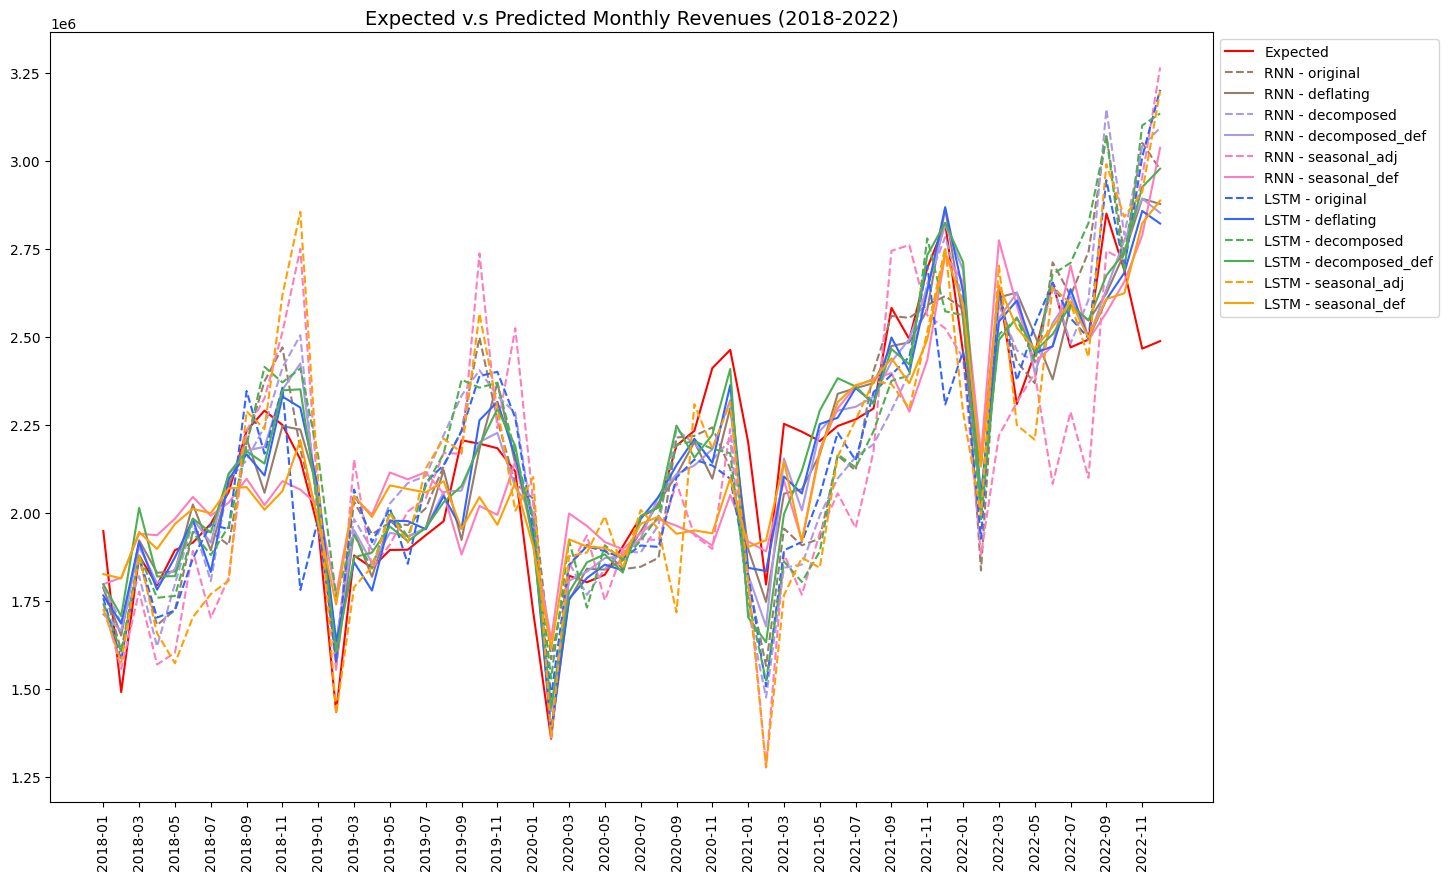

In [ ]:
plotExpectedPredictedRevenues(org_data, pred_rnn, pred_lstm, start_y, nn=True)

#### **8.1.2 分模型畫圖**

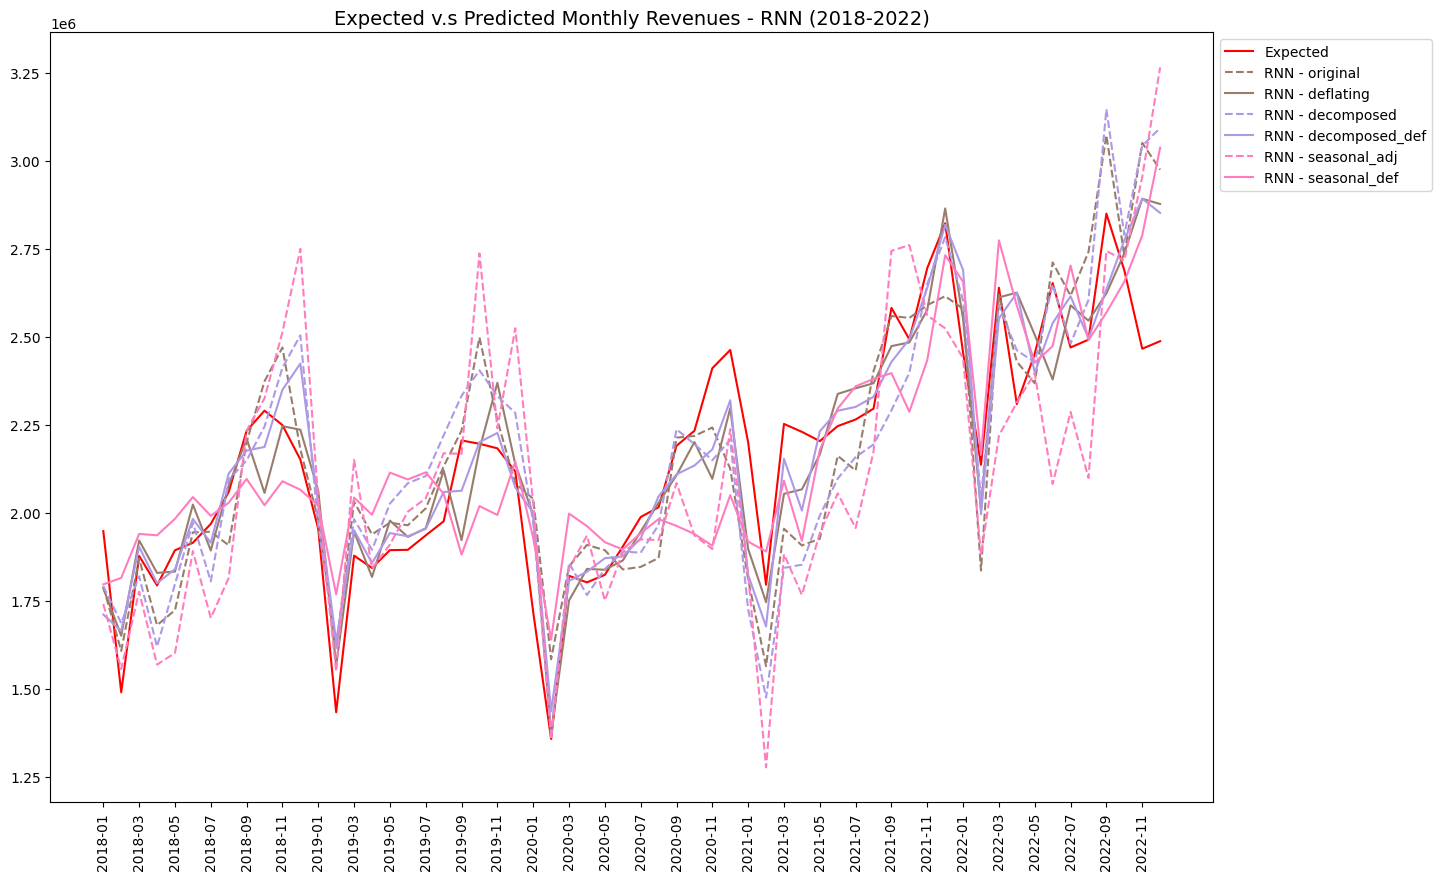

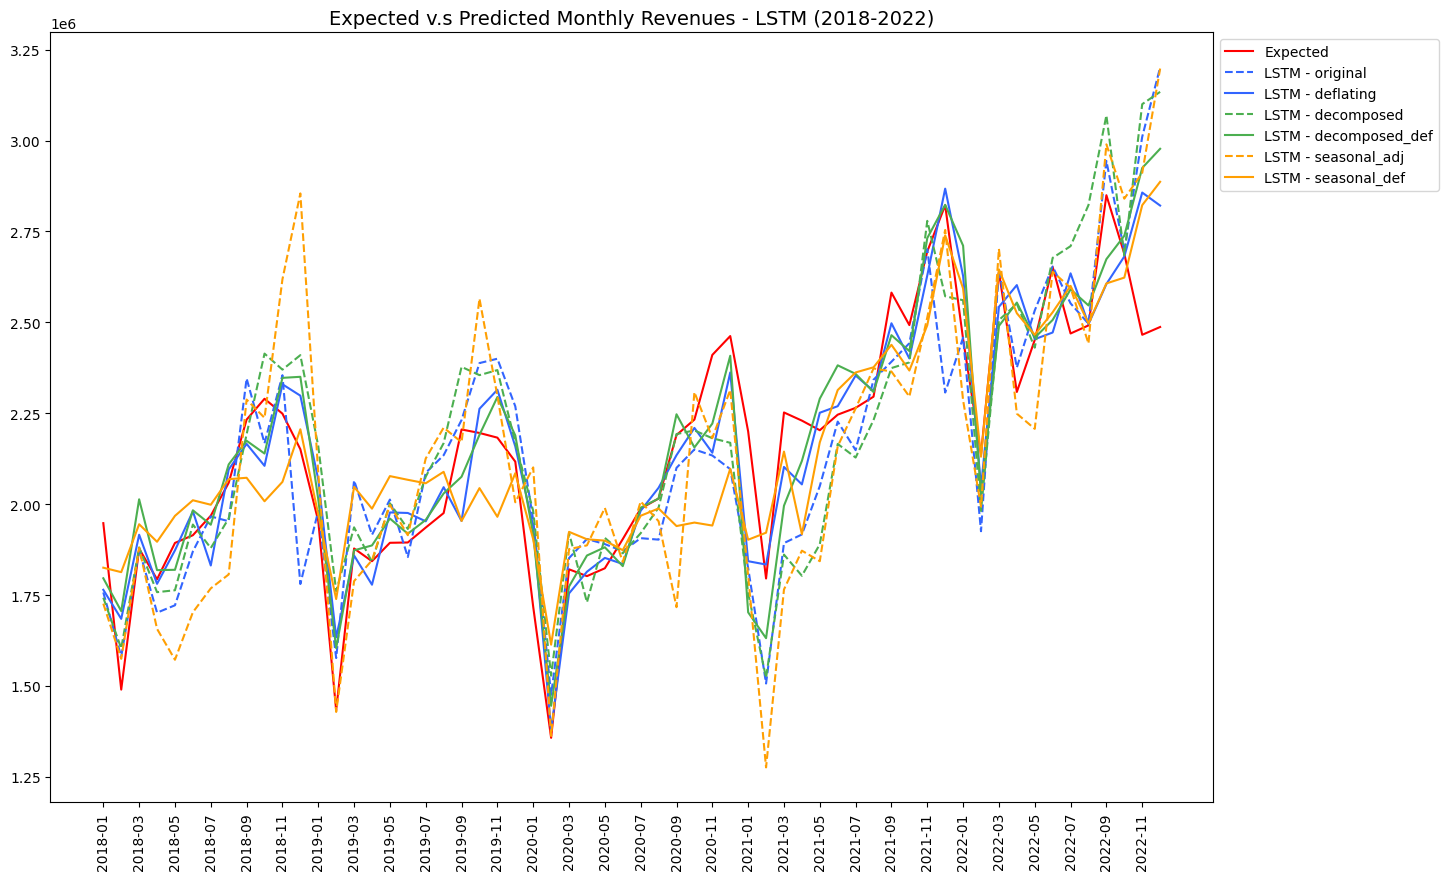

In [ ]:
plotModelExpectedPredictedRevenues(org_data, pred_rnn, 'rnn', start_y)
plotModelExpectedPredictedRevenues(org_data, pred_lstm, 'lstm', start_y)

### **8.2 Scores: RMSE, MAPE, MAE, MAE%**

*   RMSE (Root Mean Square Error)

  $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2}$

<br>

*   MAE (Mean Absolute Error)

  $MAE = \frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|$

<br>

*   MAE% (MAE / mean of the sum of y_true)

  $MAE\% = \frac{\frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|}{\frac{1}{n}\sum_{i=1}^n y_i} = \frac{\sum_{i=1}^n|\hat{y}_i - y_i|}{\sum_{i=1}^n y_i}$

<br>

*   MAPE (Mean Absolute Percentage Error)

  $MAPE(\%) = \frac{1}{n}\sum_{i=1}^n \frac{|\hat{y}_i - y_i|}{y_i}$


#### **8.2.1 Plot All Scores**

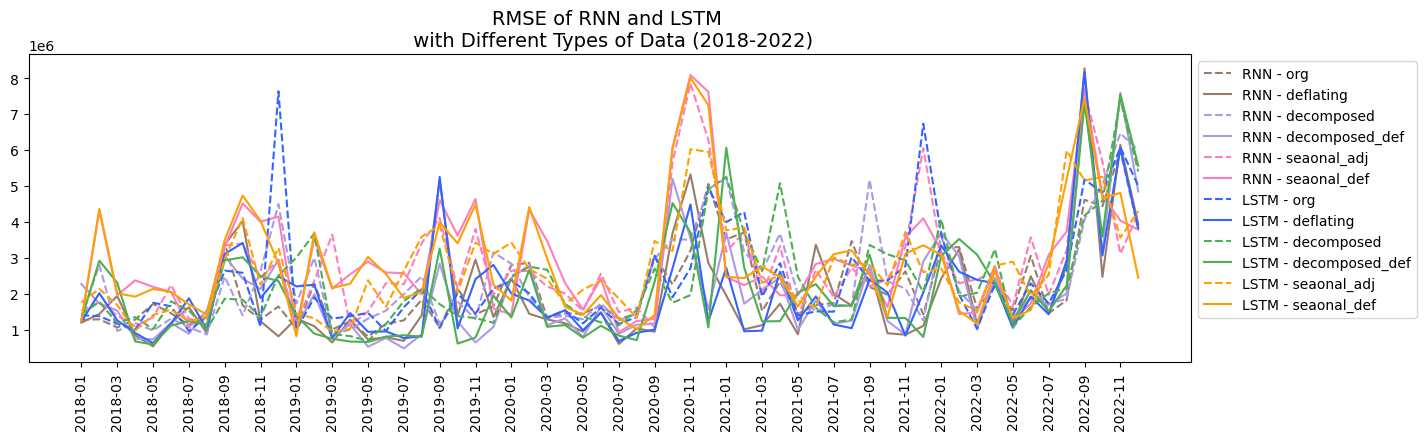

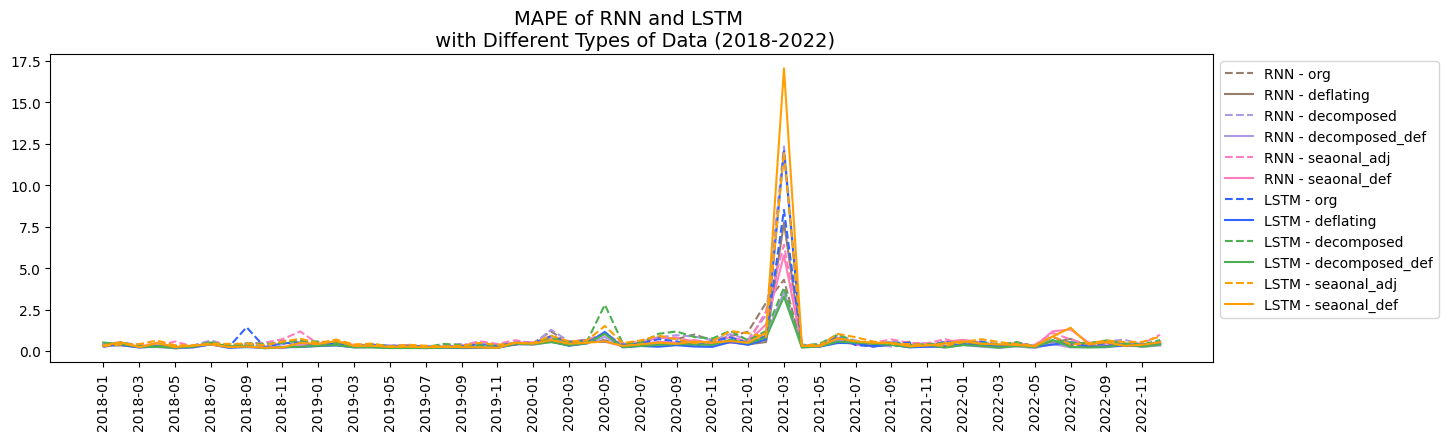

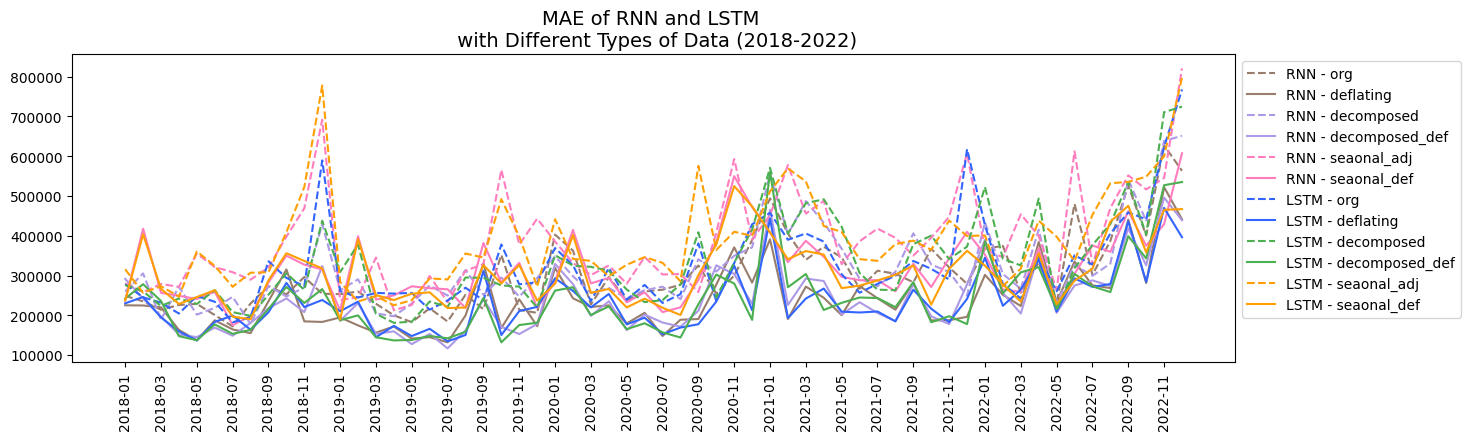

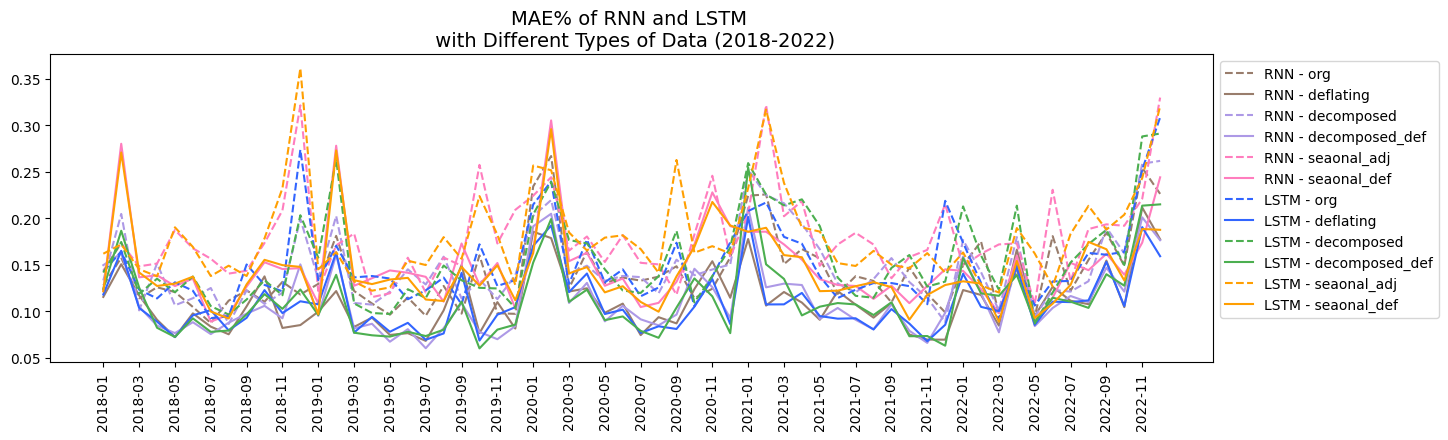

In [ ]:
plotAllScores(scores_rnn, scores_lstm, start_y, nn=True)

#### **8.2.2 分模型畫圖**

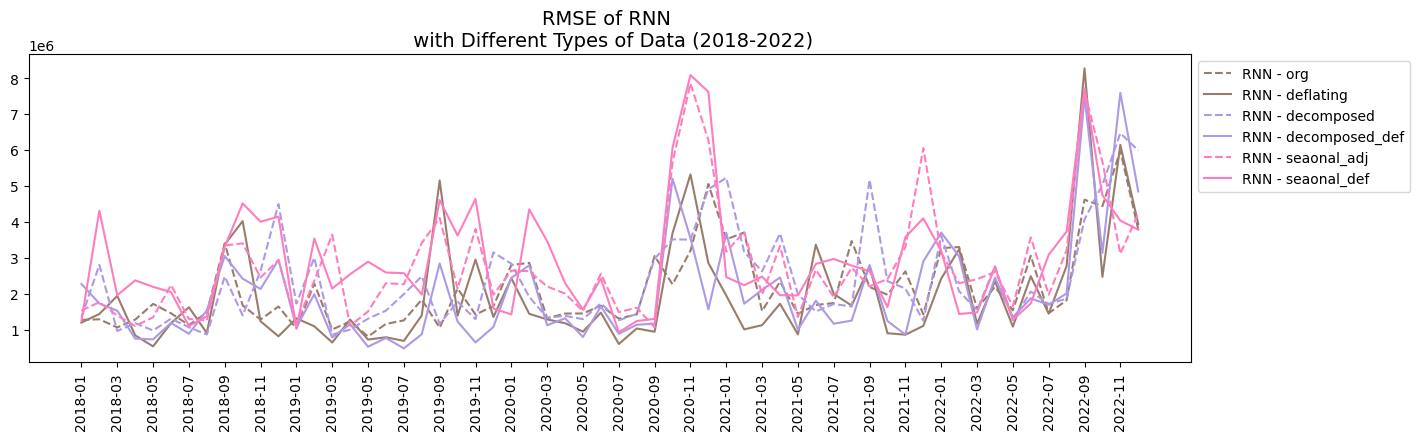

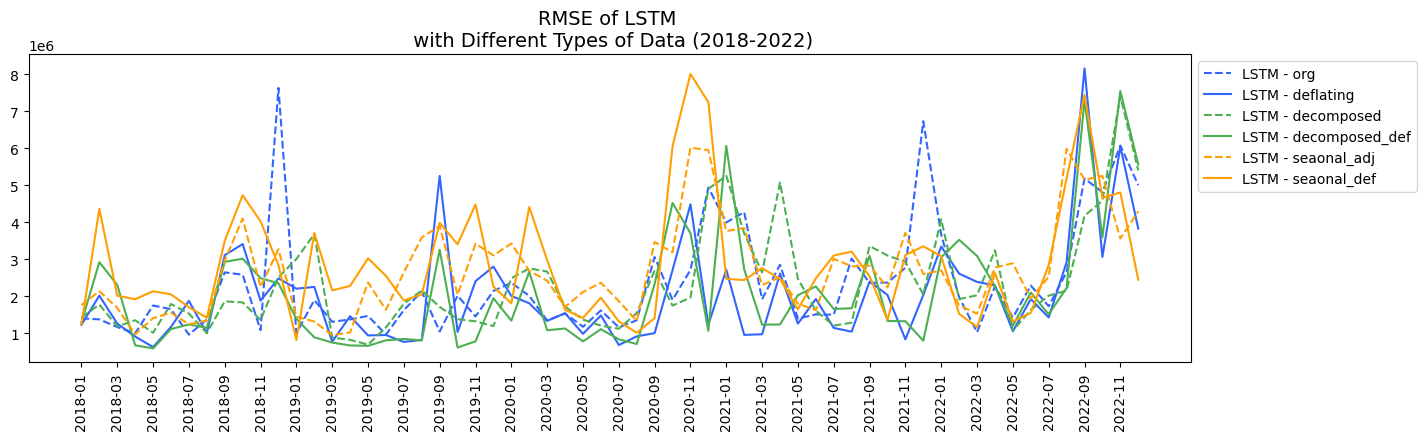

In [ ]:
# RMSE
compareModelScore(scores_rnn, scores_lstm, 'RMSE', start_y, nn=True)  

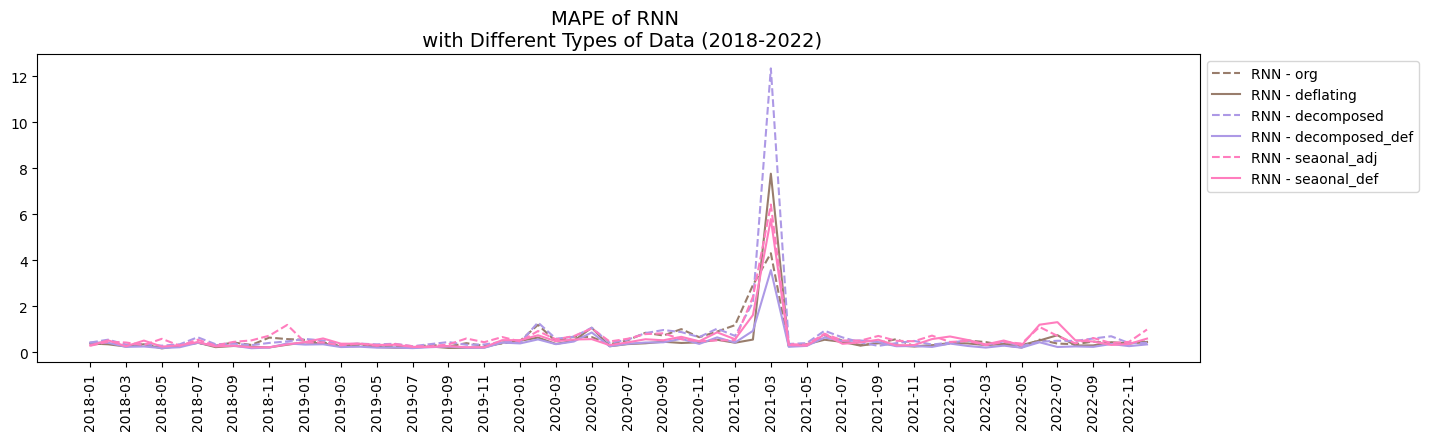

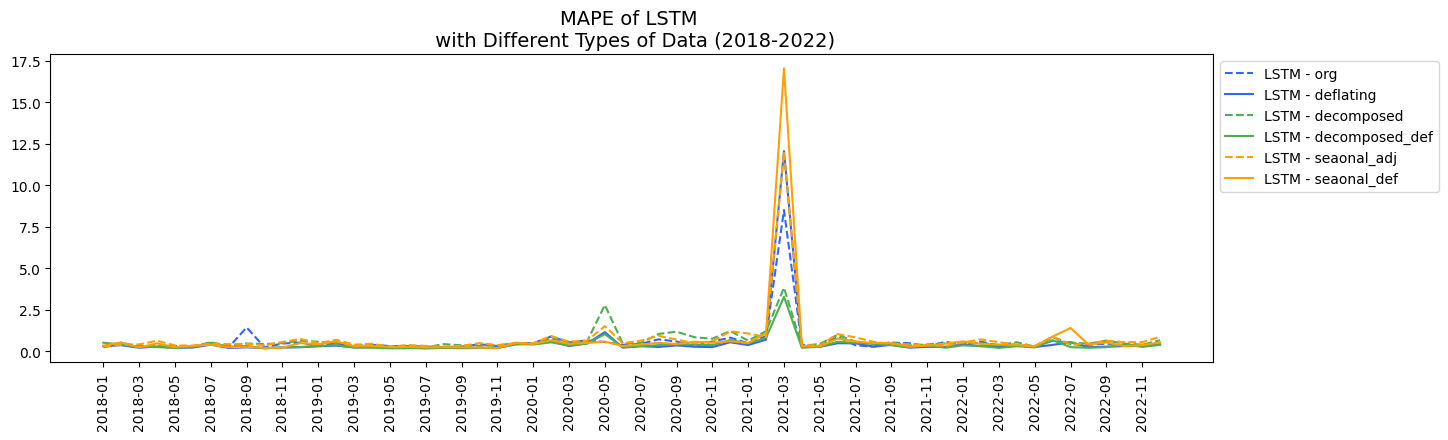

In [ ]:
# MAPE
compareModelScore(scores_rnn, scores_lstm, 'MAPE', start_y, nn=True)  

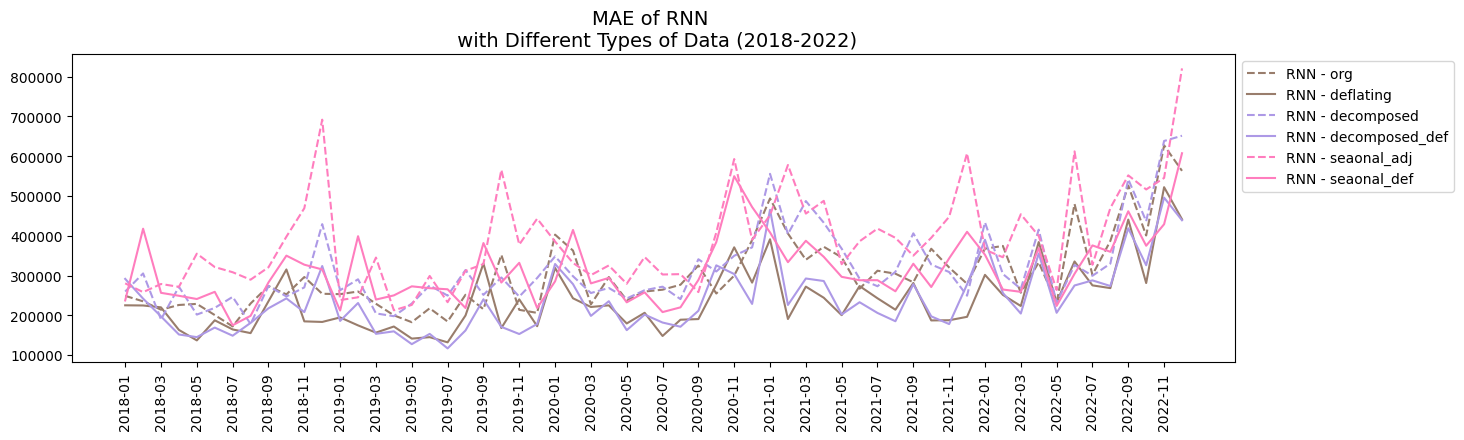

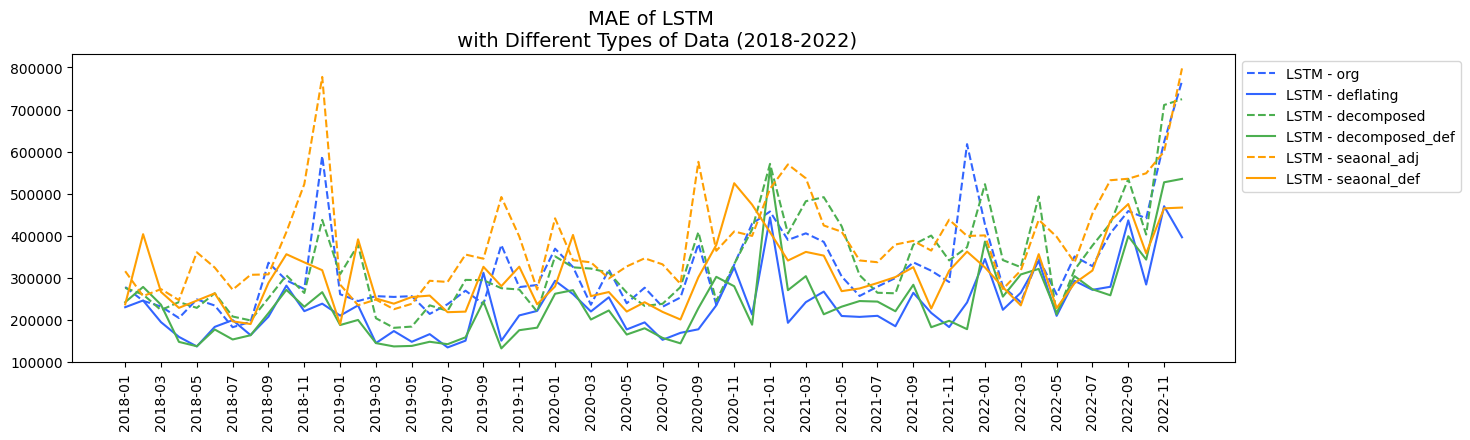

In [ ]:
# MAE
compareModelScore(scores_rnn, scores_lstm, 'MAE', start_y, nn=True)  

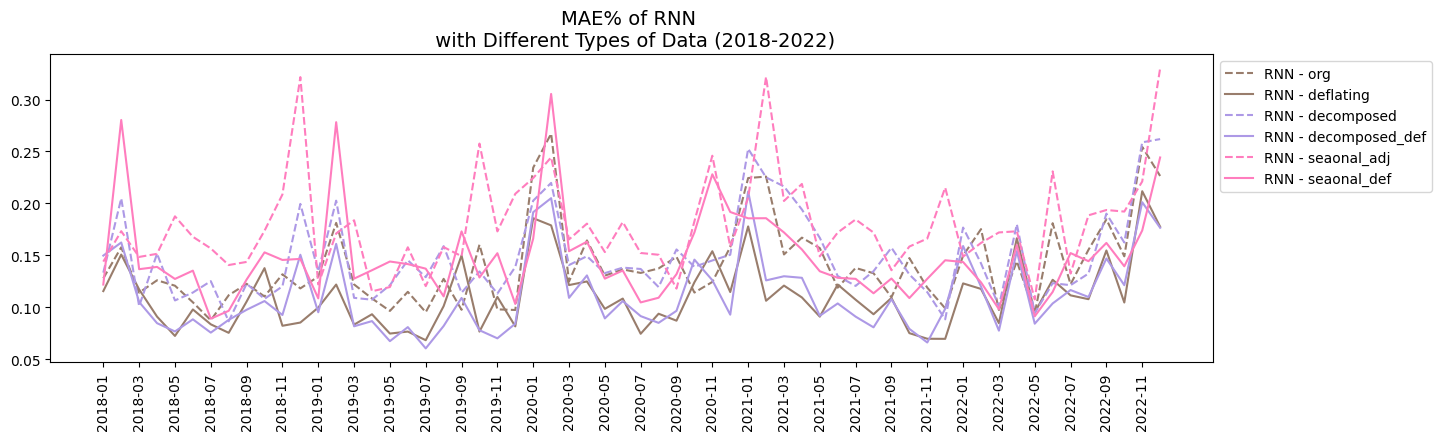

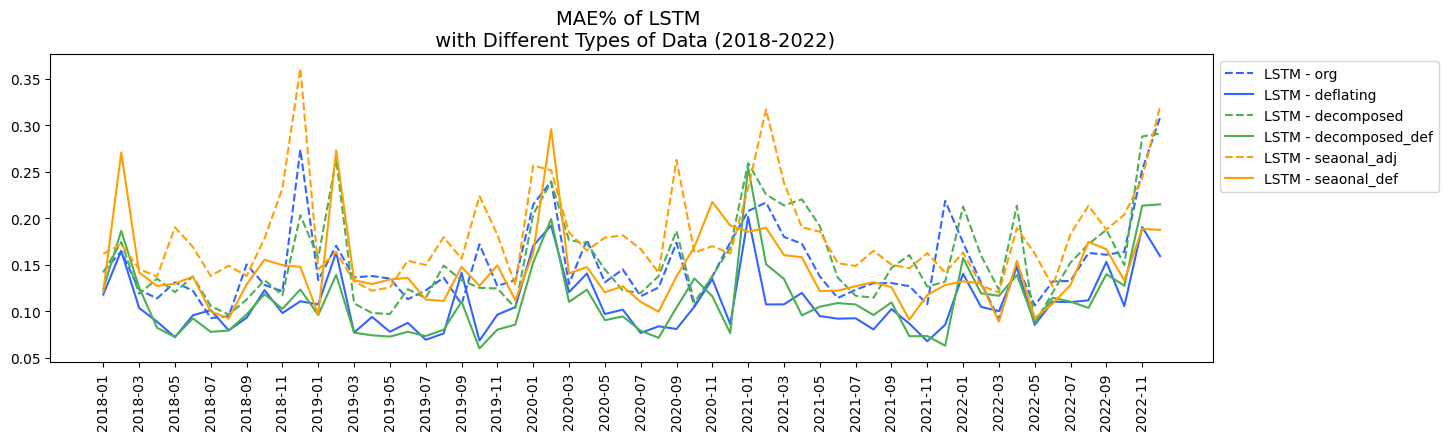

In [ ]:
# MAE%
compareModelScore(scores_rnn, scores_lstm, 'MAE%', start_y, nn=True)  

#### **8.2.3 Boxplot**

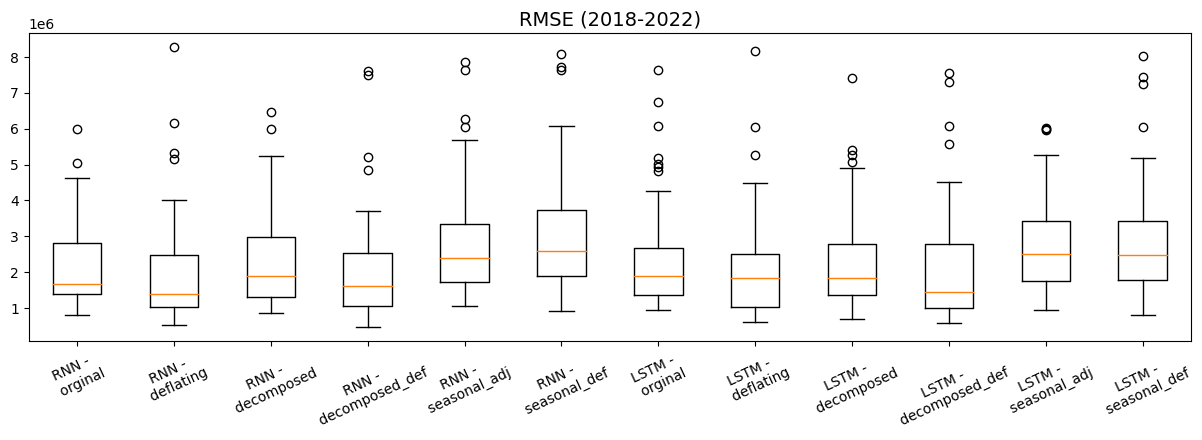

In [ ]:
# RMSE
scoreBoxplotV(scores_rnn, scores_lstm, 'RMSE', start_y, nn=True)  

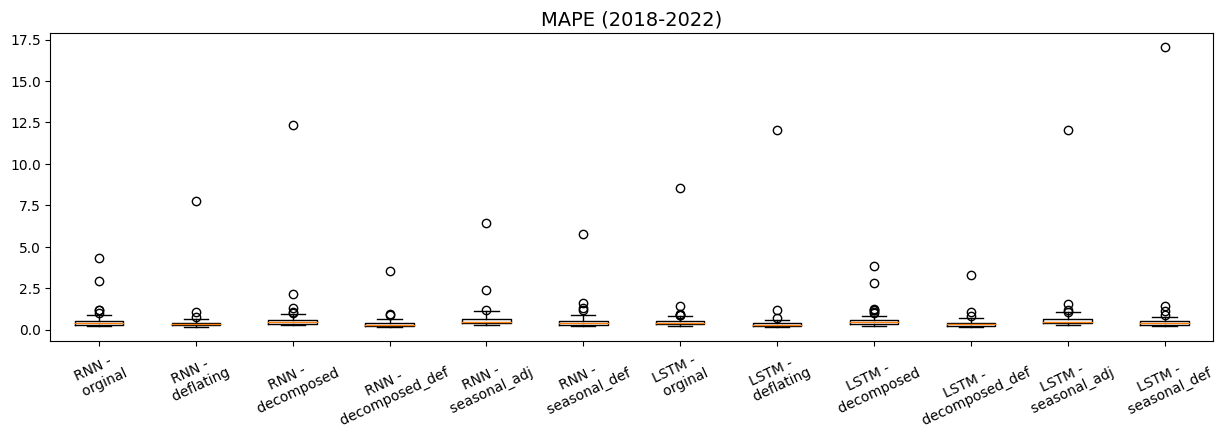

In [ ]:
# MAPE
scoreBoxplotV(scores_rnn, scores_lstm, 'MAPE', start_y, nn=True)  

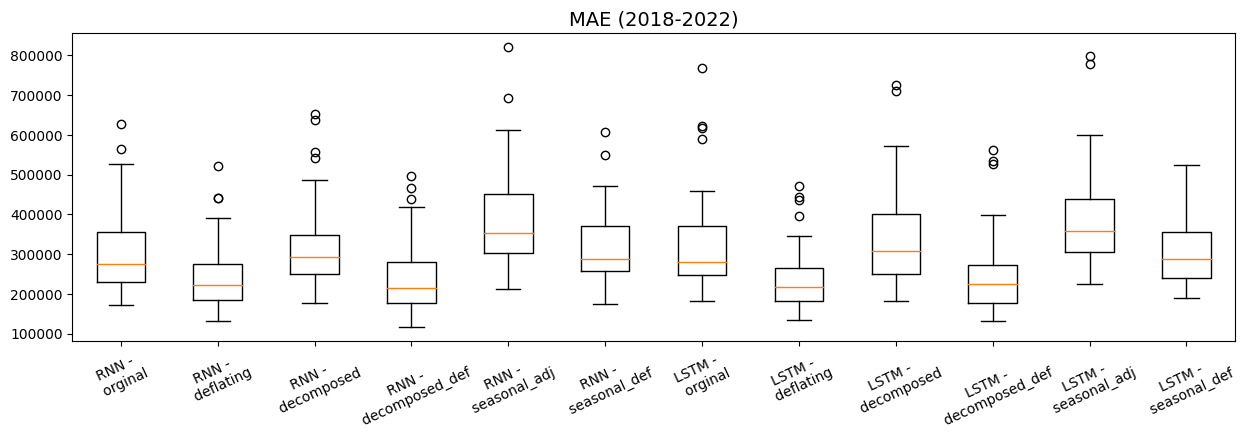

In [ ]:
# MAE
scoreBoxplotV(scores_rnn, scores_lstm, 'MAE', start_y, nn=True)  

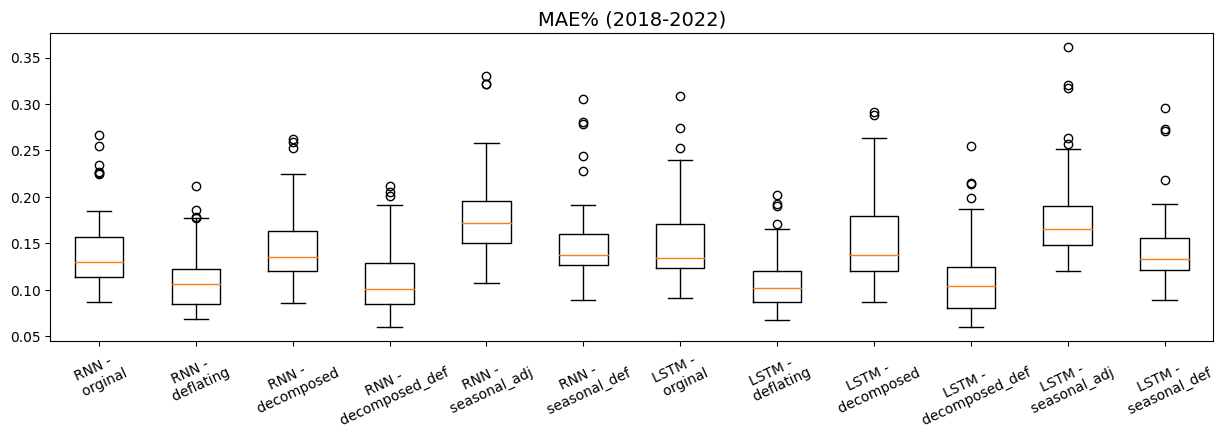

In [ ]:
# MAE%
scoreBoxplotV(scores_rnn, scores_lstm, 'MAE%', start_y, nn=True)  

## **9. Best and Worst Model**

In [ ]:
bw = BestWorstModelNN(scores_rnn, scores_lstm)

### **9.1 各模型組合中，預測最好和最差的月份**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|6|4|2 (fixed)|2x6x4x2 = 96|

#### **9.1.1 RMSE**

In [ ]:
best_rmse, worst_rmse = bw.findBestWorstForAll('RMSE')

##### **最佳月份**

In [ ]:
best_rmse

modelName    dataType scoreType min_month  min_score
0        RNN         org      RMSE   2019-05   813898.0
4        RNN         def      RMSE   2018-05   539210.0
8        RNN         dec      RMSE   2019-03   866353.0
12       RNN     dec_def      RMSE   2019-07   482345.0
16       RNN      season      RMSE   2020-09  1068043.0
20       RNN  season_def      RMSE   2020-07   931234.0
0       LSTM         org      RMSE   2018-07   963683.0
4       LSTM         def      RMSE   2018-05   628991.0
8       LSTM         dec      RMSE   2019-05   695386.0
12      LSTM     dec_def      RMSE   2018-05   593053.0
16      LSTM      season      RMSE   2019-03   951497.0
20      LSTM  season_def      RMSE   2019-01   819718.0

##### **最差月份**

In [ ]:
worst_rmse

modelName    dataType scoreType max_month  max_score
0        RNN         org      RMSE   2022-11  5980303.0
4        RNN         def      RMSE   2022-09  8270148.0
8        RNN         dec      RMSE   2022-11  6468443.0
12       RNN     dec_def      RMSE   2022-11  7589164.0
16       RNN      season      RMSE   2020-11  7852515.0
20       RNN  season_def      RMSE   2020-11  8084772.0
0       LSTM         org      RMSE   2018-12  7632567.0
4       LSTM         def      RMSE   2022-09  8159519.0
8       LSTM         dec      RMSE   2022-11  7410467.0
12      LSTM     dec_def      RMSE   2022-11  7547642.0
16      LSTM      season      RMSE   2020-11  6020122.0
20      LSTM  season_def      RMSE   2020-11  8009732.0

#### **9.1.2 MAPE**

In [ ]:
best_mape, worst_mape = bw.findBestWorstForAll('MAPE')

##### **最佳月份**

In [ ]:
best_mape

modelName    dataType scoreType min_month  min_score
3        RNN         org      MAPE   2022-05     0.1991
7        RNN         def      MAPE   2018-05     0.1600
11       RNN         dec      MAPE   2019-07     0.2549
15       RNN     dec_def      MAPE   2018-10     0.1675
19       RNN      season      MAPE   2019-08     0.2489
23       RNN  season_def      MAPE   2018-10     0.2070
3       LSTM         org      MAPE   2018-08     0.2320
7       LSTM         def      MAPE   2019-07     0.1817
11      LSTM         dec      MAPE   2019-07     0.2388
15      LSTM     dec_def      MAPE   2018-10     0.1734
19      LSTM      season      MAPE   2019-05     0.2702
23      LSTM  season_def      MAPE   2019-11     0.1958

##### **最差月份**

In [ ]:
worst_mape

modelName    dataType scoreType max_month  max_score
3        RNN         org      MAPE   2021-03     4.2999
7        RNN         def      MAPE   2021-03     7.7585
11       RNN         dec      MAPE   2021-03    12.3384
15       RNN     dec_def      MAPE   2021-03     3.5631
19       RNN      season      MAPE   2021-03     6.4149
23       RNN  season_def      MAPE   2021-03     5.7825
3       LSTM         org      MAPE   2021-03     8.5142
7       LSTM         def      MAPE   2021-03    12.0710
11      LSTM         dec      MAPE   2021-03     3.8323
15      LSTM     dec_def      MAPE   2021-03     3.2831
19      LSTM      season      MAPE   2021-03    12.0202
23      LSTM  season_def      MAPE   2021-03    17.0539

#### **9.1.3 MAE**

In [ ]:
best_mae, worst_mae = bw.findBestWorstForAll('MAE')

##### **最佳月份**

In [ ]:
best_mae

modelName    dataType scoreType min_month  min_score
1        RNN         org       MAE   2018-07   172010.0
5        RNN         def       MAE   2019-07   131933.0
9        RNN         dec       MAE   2018-08   177982.0
13       RNN     dec_def       MAE   2019-07   116678.0
17       RNN      season       MAE   2019-04   212500.0
21       RNN  season_def       MAE   2018-07   174931.0
1       LSTM         org       MAE   2018-07   182417.0
5       LSTM         def       MAE   2019-07   134356.0
9       LSTM         dec       MAE   2019-04   180971.0
13      LSTM     dec_def       MAE   2019-10   132049.0
17      LSTM      season       MAE   2019-04   225193.0
21      LSTM  season_def       MAE   2019-01   189136.0

##### **最差月份**

In [ ]:
worst_mae

modelName    dataType scoreType max_month  max_score
1        RNN         org       MAE   2022-11   627270.0
5        RNN         def       MAE   2022-11   522052.0
9        RNN         dec       MAE   2022-12   651470.0
13       RNN     dec_def       MAE   2022-11   495796.0
17       RNN      season       MAE   2022-12   820774.0
21       RNN  season_def       MAE   2022-12   607415.0
1       LSTM         org       MAE   2022-12   767751.0
5       LSTM         def       MAE   2022-11   470101.0
9       LSTM         dec       MAE   2022-12   724650.0
13      LSTM     dec_def       MAE   2021-01   560480.0
17      LSTM      season       MAE   2022-12   797771.0
21      LSTM  season_def       MAE   2020-11   524796.0

#### **9.1.3 MAE%**

In [ ]:
best_mae_p, worst_mae_p = bw.findBestWorstForAll('MAE%')

##### **最佳月份**

In [ ]:
best_mae_p

modelName    dataType scoreType min_month  min_score
2        RNN         org      MAE%   2018-07     0.0874
6        RNN         def      MAE%   2019-07     0.0682
10       RNN         dec      MAE%   2018-08     0.0864
14       RNN     dec_def      MAE%   2019-07     0.0603
18       RNN      season      MAE%   2022-05     0.1075
22       RNN  season_def      MAE%   2018-07     0.0889
2       LSTM         org      MAE%   2022-03     0.0917
6       LSTM         def      MAE%   2021-11     0.0678
10      LSTM         dec      MAE%   2022-05     0.0869
14      LSTM     dec_def      MAE%   2019-10     0.0601
18      LSTM      season      MAE%   2022-03     0.1202
22      LSTM  season_def      MAE%   2022-03     0.0888

##### **最差月份**

In [ ]:
worst_mae_p

modelName    dataType scoreType max_month  max_score
2        RNN         org      MAE%   2020-02     0.2671
6        RNN         def      MAE%   2022-11     0.2117
10       RNN         dec      MAE%   2022-12     0.2619
14       RNN     dec_def      MAE%   2021-01     0.2115
18       RNN      season      MAE%   2022-12     0.3300
22       RNN  season_def      MAE%   2020-02     0.3054
2       LSTM         org      MAE%   2022-12     0.3087
6       LSTM         def      MAE%   2021-01     0.2016
10      LSTM         dec      MAE%   2022-12     0.2913
14      LSTM     dec_def      MAE%   2021-01     0.2547
18      LSTM      season      MAE%   2018-12     0.3614
22      LSTM  season_def      MAE%   2020-02     0.2960

### **9.2 RNN 和 LSTM 各自預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|1|4|2 (fixed)|2x1x4x2 = 16|

#### **9.2.1 RMSE**

##### **最佳模型**

In [ ]:
# RNN
bw.best_rnn['RMSE']

modelName dataType scoreType min_month  min_score
12       RNN  dec_def      RMSE   2019-07   482345.0

In [ ]:
# LSTM
bw.best_lstm['RMSE']

modelName dataType scoreType min_month  min_score
12      LSTM  dec_def      RMSE   2018-05   593053.0

##### **最差模型**

In [ ]:
# RNN
bw.worst_rnn['RMSE']

modelName dataType scoreType max_month  max_score
4       RNN      def      RMSE   2022-09  8270148.0

In [ ]:
# LSTM
bw.worst_lstm['RMSE']

modelName dataType scoreType max_month  max_score
4      LSTM      def      RMSE   2022-09  8159519.0

#### **9.2.2 MAPE**

##### **最佳模型**

In [ ]:
# RNN
bw.best_rnn['MAPE']

modelName dataType scoreType min_month  min_score
7       RNN      def      MAPE   2018-05       0.16

In [ ]:
# LSTM
bw.best_lstm['MAPE']

modelName dataType scoreType min_month  min_score
15      LSTM  dec_def      MAPE   2018-10     0.1734

##### **最差模型**

In [ ]:
# RNN
bw.worst_rnn['MAPE']

modelName dataType scoreType max_month  max_score
11       RNN      dec      MAPE   2021-03    12.3384

In [ ]:
# LSTM
bw.worst_lstm['MAPE']

modelName    dataType scoreType max_month  max_score
23      LSTM  season_def      MAPE   2021-03    17.0539

#### **9.2.3 MAE**

##### **最佳模型**

In [ ]:
# RNN
bw.best_rnn['MAE']

modelName dataType scoreType min_month  min_score
13       RNN  dec_def       MAE   2019-07   116678.0

In [ ]:
# LSTM
bw.best_lstm['MAE']

modelName dataType scoreType min_month  min_score
13      LSTM  dec_def       MAE   2019-10   132049.0

##### **最差模型**

In [ ]:
# RNN
bw.worst_rnn['MAE']

modelName dataType scoreType max_month  max_score
17       RNN   season       MAE   2022-12   820774.0

In [ ]:
# LSTM
bw.worst_lstm['MAE']

modelName dataType scoreType max_month  max_score
17      LSTM   season       MAE   2022-12   797771.0

#### **9.2.4 MAE%**

##### **最佳模型**

In [ ]:
# RNN
bw.best_rnn['MAE%']

modelName dataType scoreType min_month  min_score
14       RNN  dec_def      MAE%   2019-07     0.0603

In [ ]:
# LSTM
bw.best_lstm['MAE%']

modelName dataType scoreType min_month  min_score
14      LSTM  dec_def      MAE%   2019-10     0.0601

##### **最差模型**

In [ ]:
# RNN
bw.worst_rnn['MAE%']

modelName dataType scoreType max_month  max_score
18       RNN   season      MAE%   2022-12       0.33

In [ ]:
# LSTM
bw.worst_lstm['MAE%']

modelName dataType scoreType max_month  max_score
18      LSTM   season      MAE%   2018-12     0.3614

### **9.3 所有模型組合中，預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|1|1|4|2 (fixed)|1x1x4x2 = 8|


#### **9.3.1 RMSE**

##### **最佳模型**

In [ ]:
bw.best_all['RMSE']

modelName dataType scoreType min_month  min_score
12       RNN  dec_def      RMSE   2019-07   482345.0

##### **最差模型**

In [ ]:
bw.worst_all['RMSE']

modelName dataType scoreType max_month  max_score
4       RNN      def      RMSE   2022-09  8270148.0

#### **9.3.2 MAPE**

##### **最佳模型**

In [ ]:
bw.best_all['MAPE']

modelName dataType scoreType min_month  min_score
7       RNN      def      MAPE   2018-05       0.16

##### **最差模型**

In [ ]:
bw.worst_all['MAPE']

modelName    dataType scoreType max_month  max_score
23      LSTM  season_def      MAPE   2021-03    17.0539

#### **9.3.3 MAE**

##### **最佳模型**

In [ ]:
bw.best_all['MAE']

modelName dataType scoreType min_month  min_score
13       RNN  dec_def       MAE   2019-07   116678.0

##### **最差模型**

In [ ]:
bw.worst_all['MAE']

modelName dataType scoreType max_month  max_score
17       RNN   season       MAE   2022-12   820774.0

#### **9.3.4 MAE%**

##### **最佳模型**

In [ ]:
bw.best_all['MAE%']

modelName dataType scoreType min_month  min_score
14      LSTM  dec_def      MAE%   2019-10     0.0601

##### **最差模型**

In [ ]:
bw.worst_all['MAE%']

modelName dataType scoreType max_month  max_score
18      LSTM   season      MAE%   2018-12     0.3614